In [1]:
# Setting auto reloading for imported modules
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from auxiliary_functions import PreprocessingUtils

In [3]:
prep_utils = PreprocessingUtils()

**Exploratory Data Analysis**

In [4]:
df = pd.read_csv('data/clean_data/clean_sessions_with_cr.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 13 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   utm_source                object
 1   utm_medium                object
 2   utm_campaign              object
 3   utm_adcontent             object
 4   utm_keyword               object
 5   device_category           object
 6   device_os                 object
 7   device_brand              object
 8   device_screen_resolution  object
 9   device_browser            object
 10  geo_country               object
 11  geo_city                  object
 12  CR                        int64 
dtypes: int64(1), object(12)
memory usage: 171.8+ MB


Univariate Analysis of th Target Feature (CR)

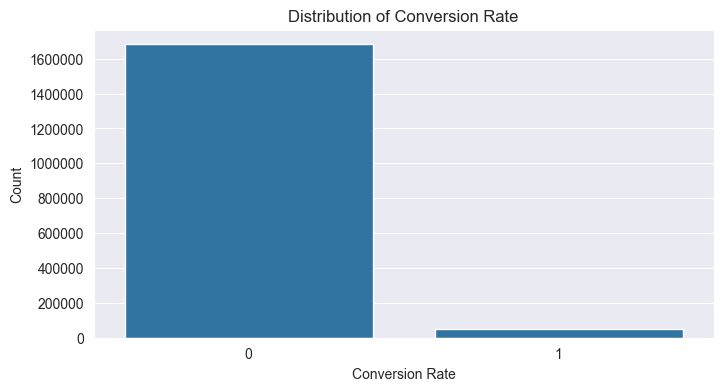

In [5]:
value_counts = df['CR'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=value_counts.index, y=value_counts.values)

plt.title('Distribution of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Count')

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

Univariate Analysis of Other Features

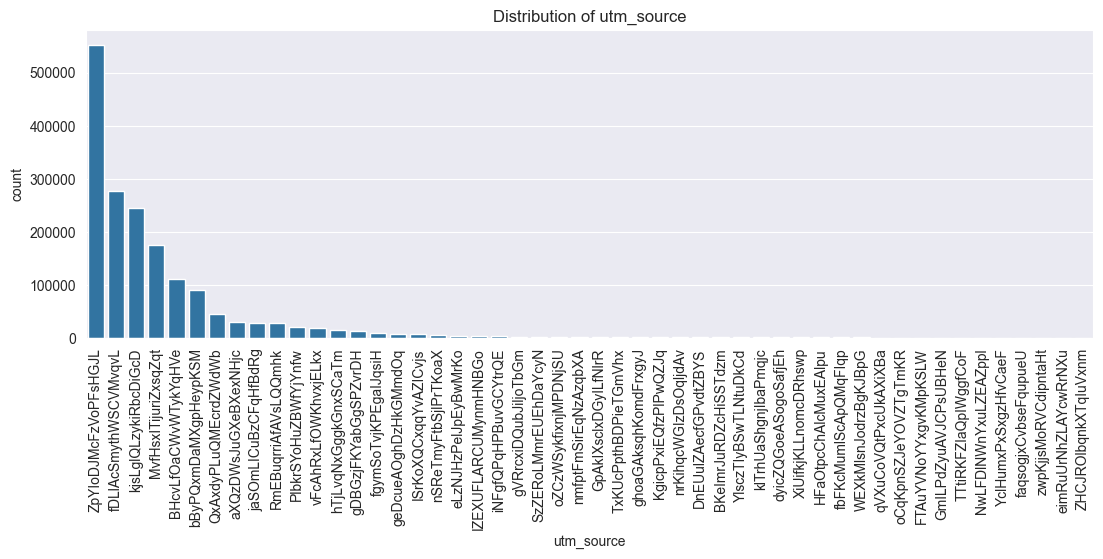

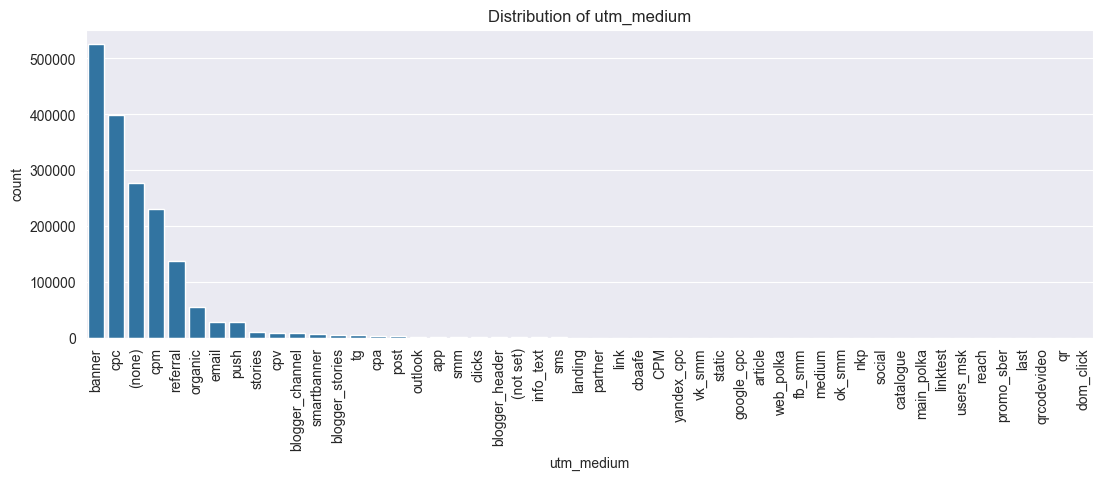

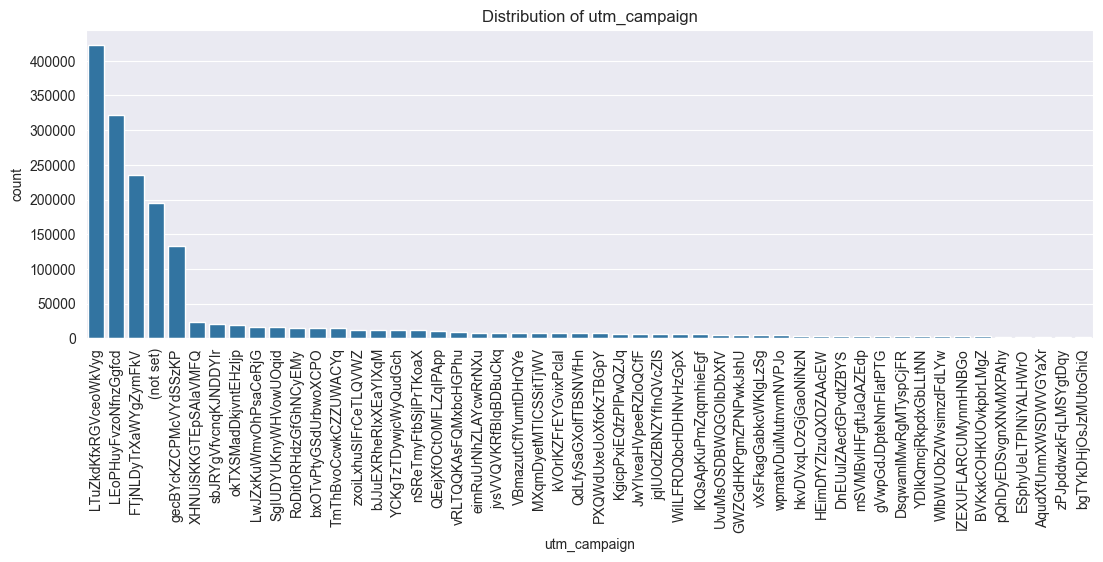

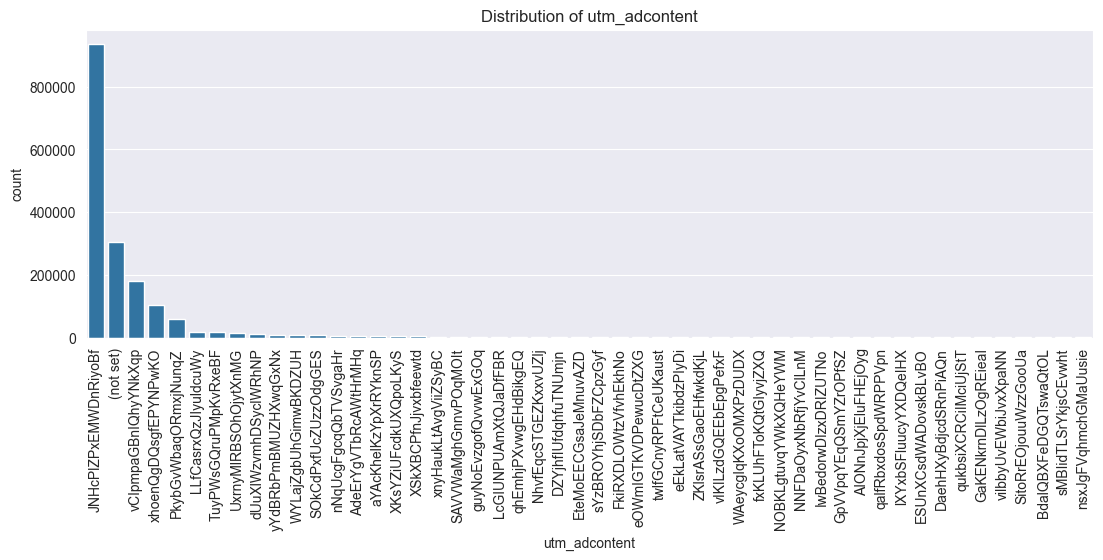

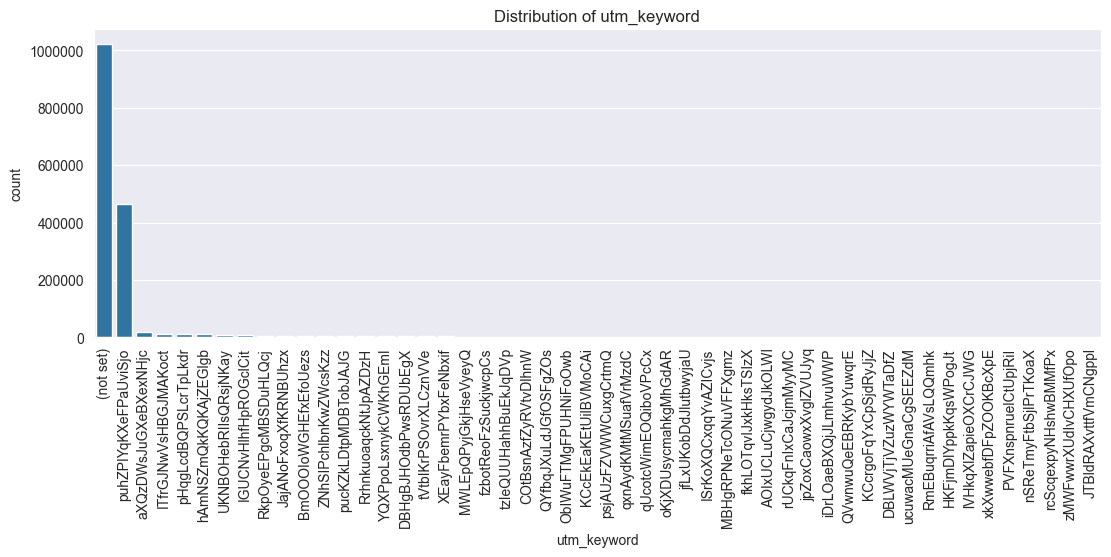

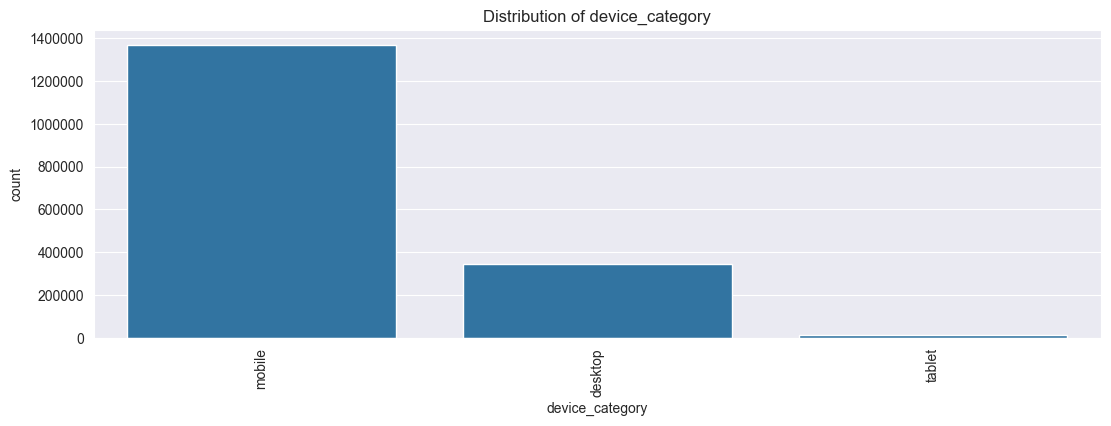

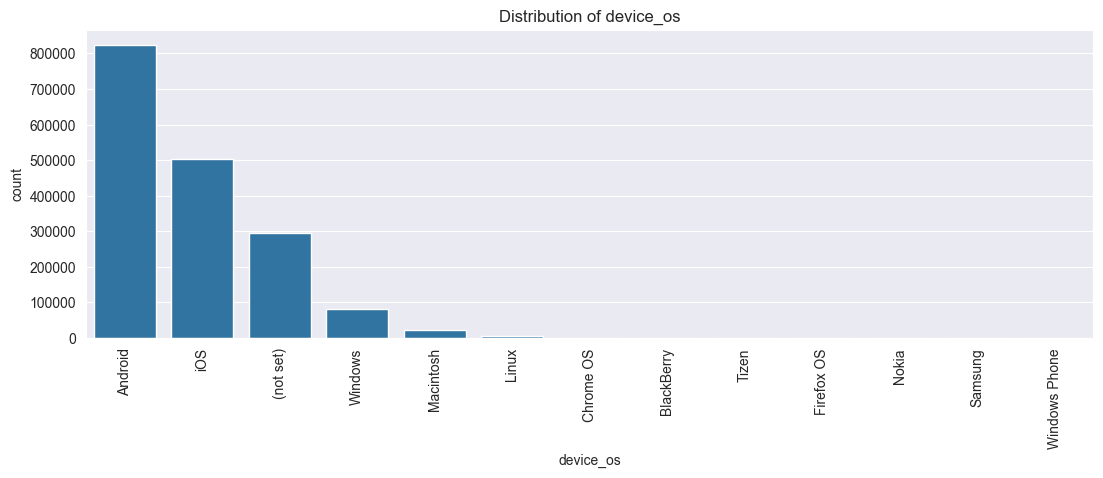

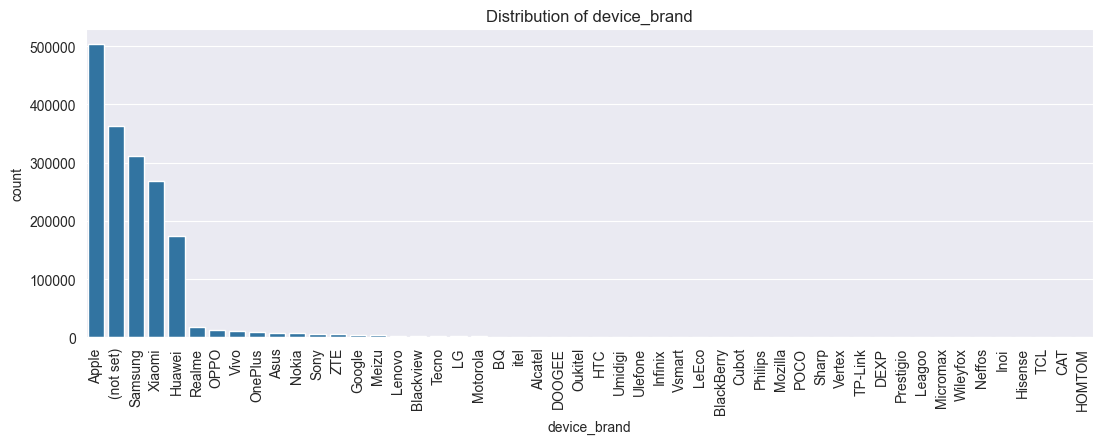

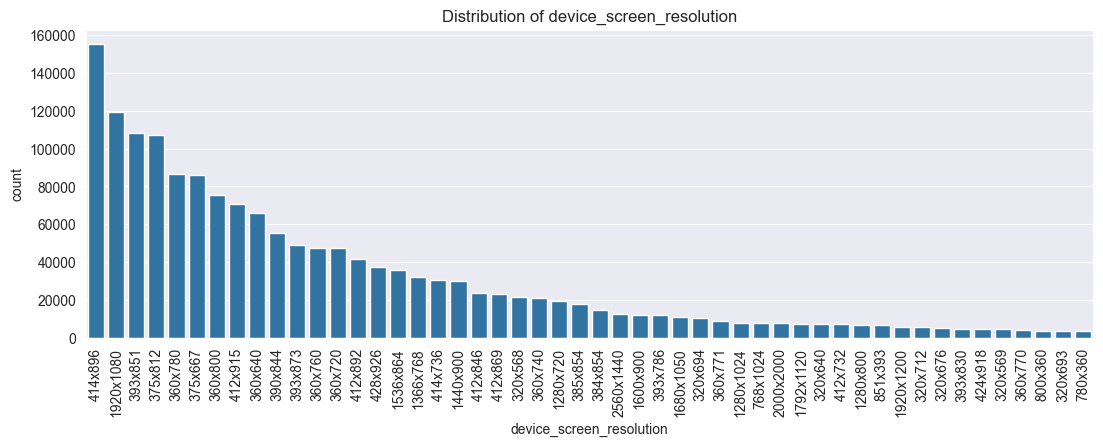

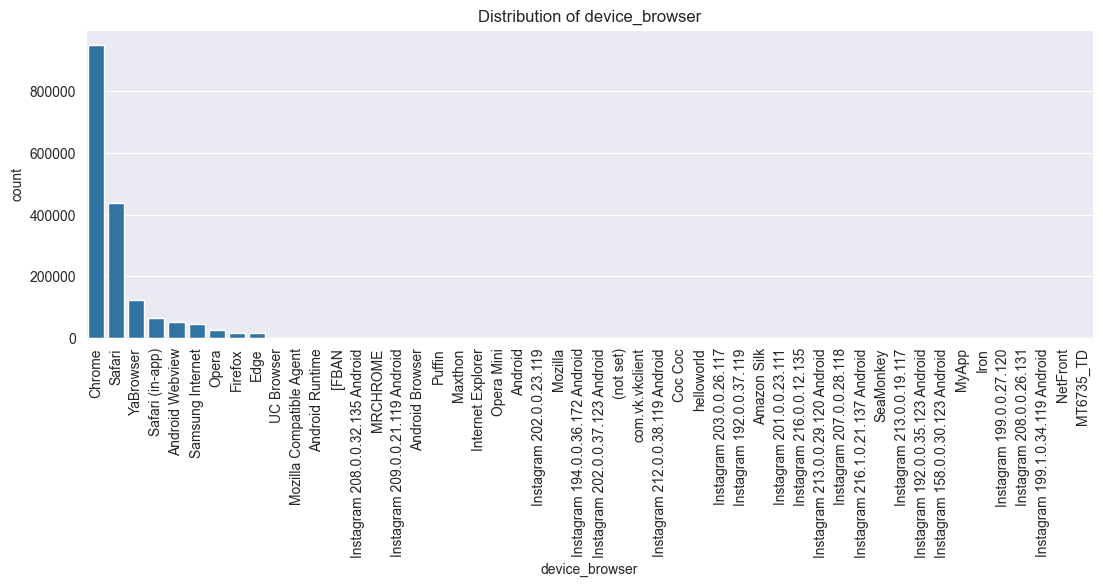

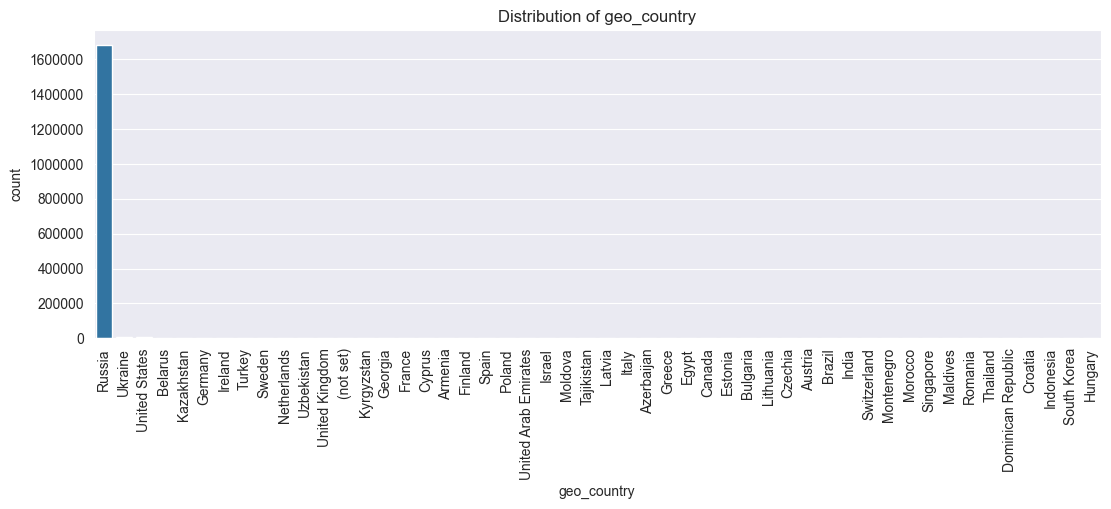

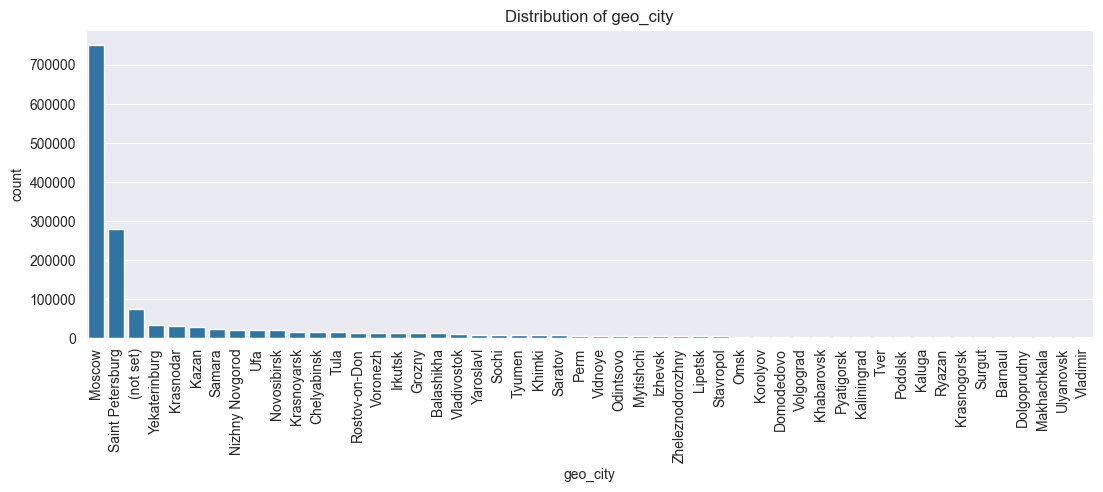

In [6]:
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(13, 4))
    
    value_counts = df[feature].value_counts()
    if len(value_counts) > 50:
        value_counts = value_counts[:50]
        
    sns.countplot(x=df[feature], order=value_counts.index)
    
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    plt.show()

Bivariate Analysis Between Features and CR

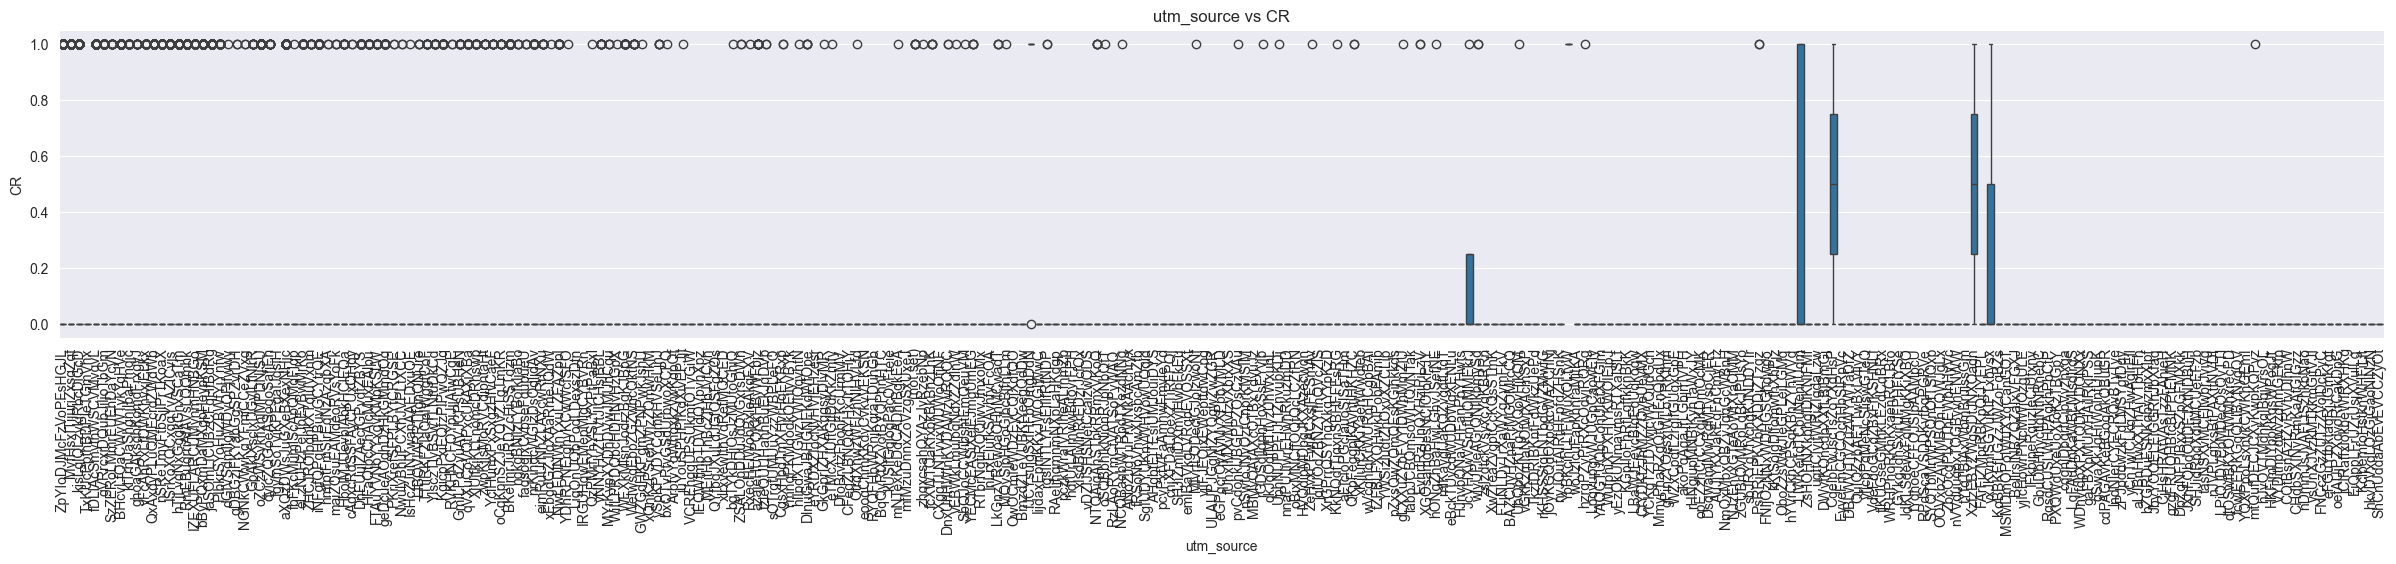

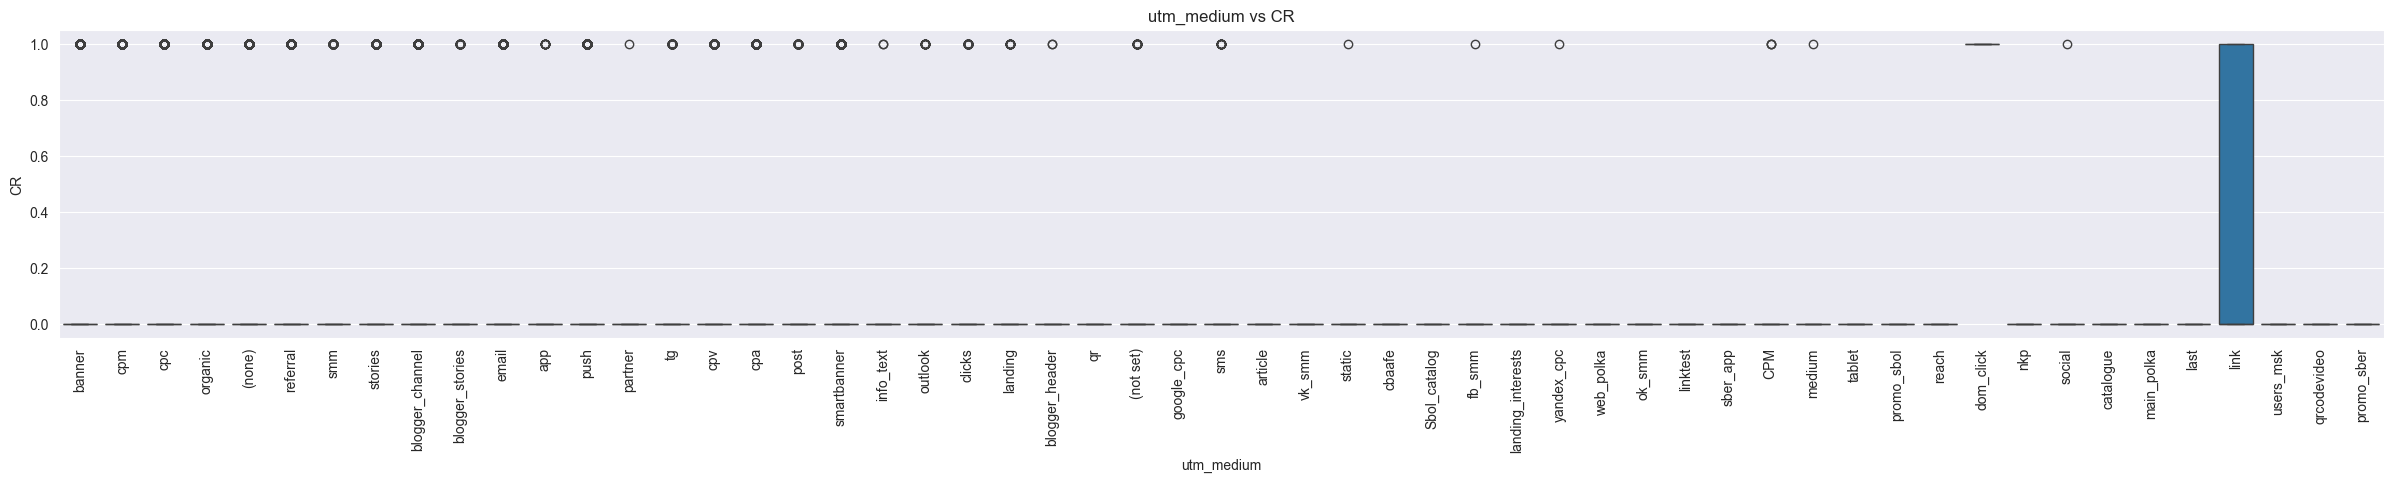

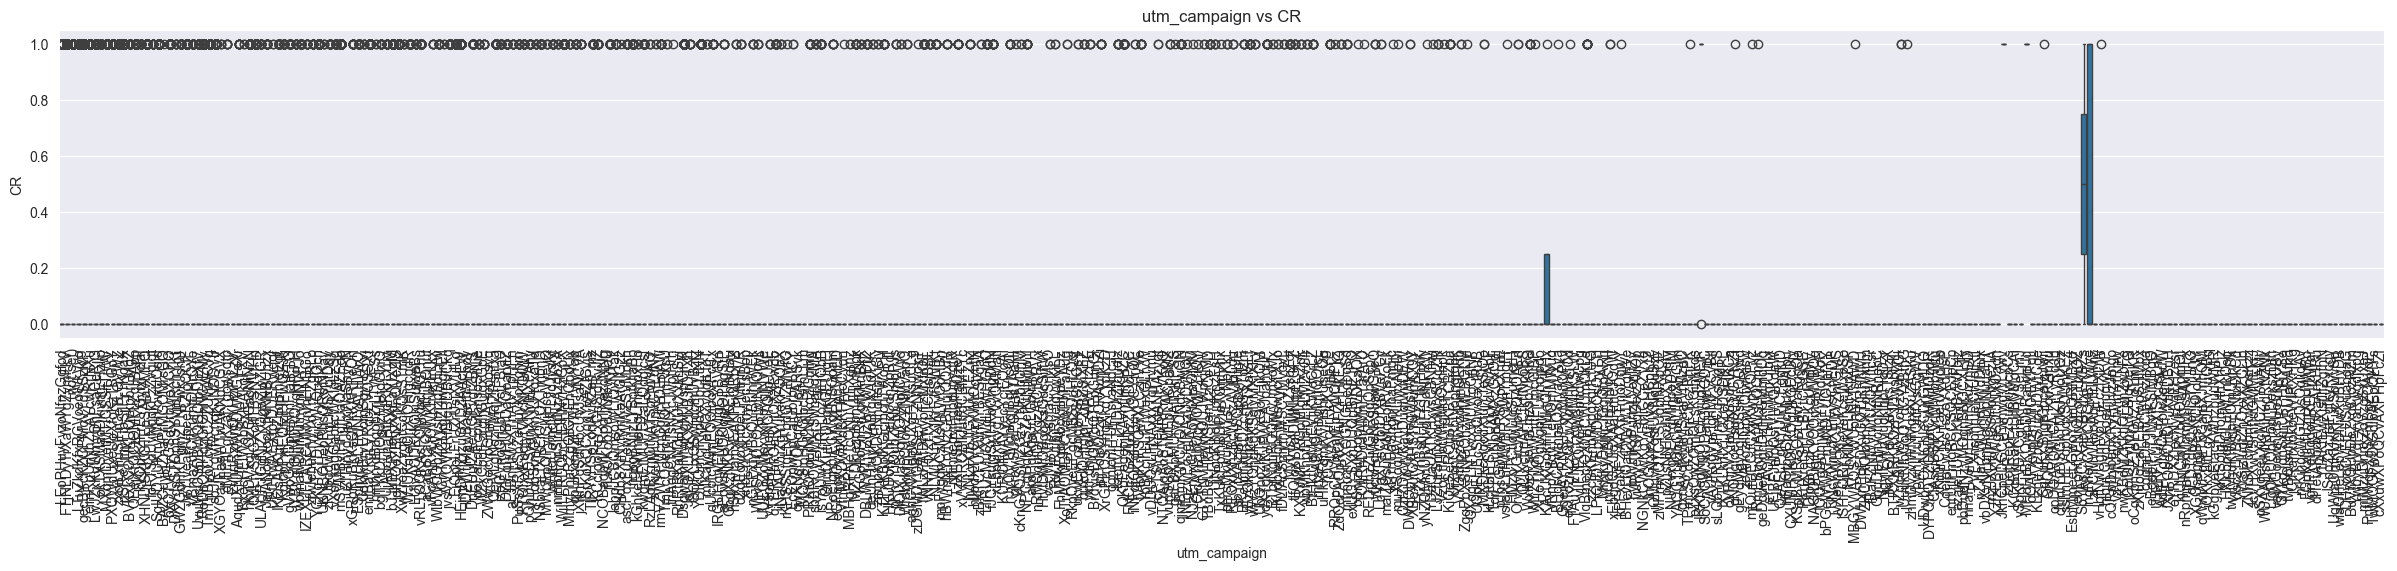

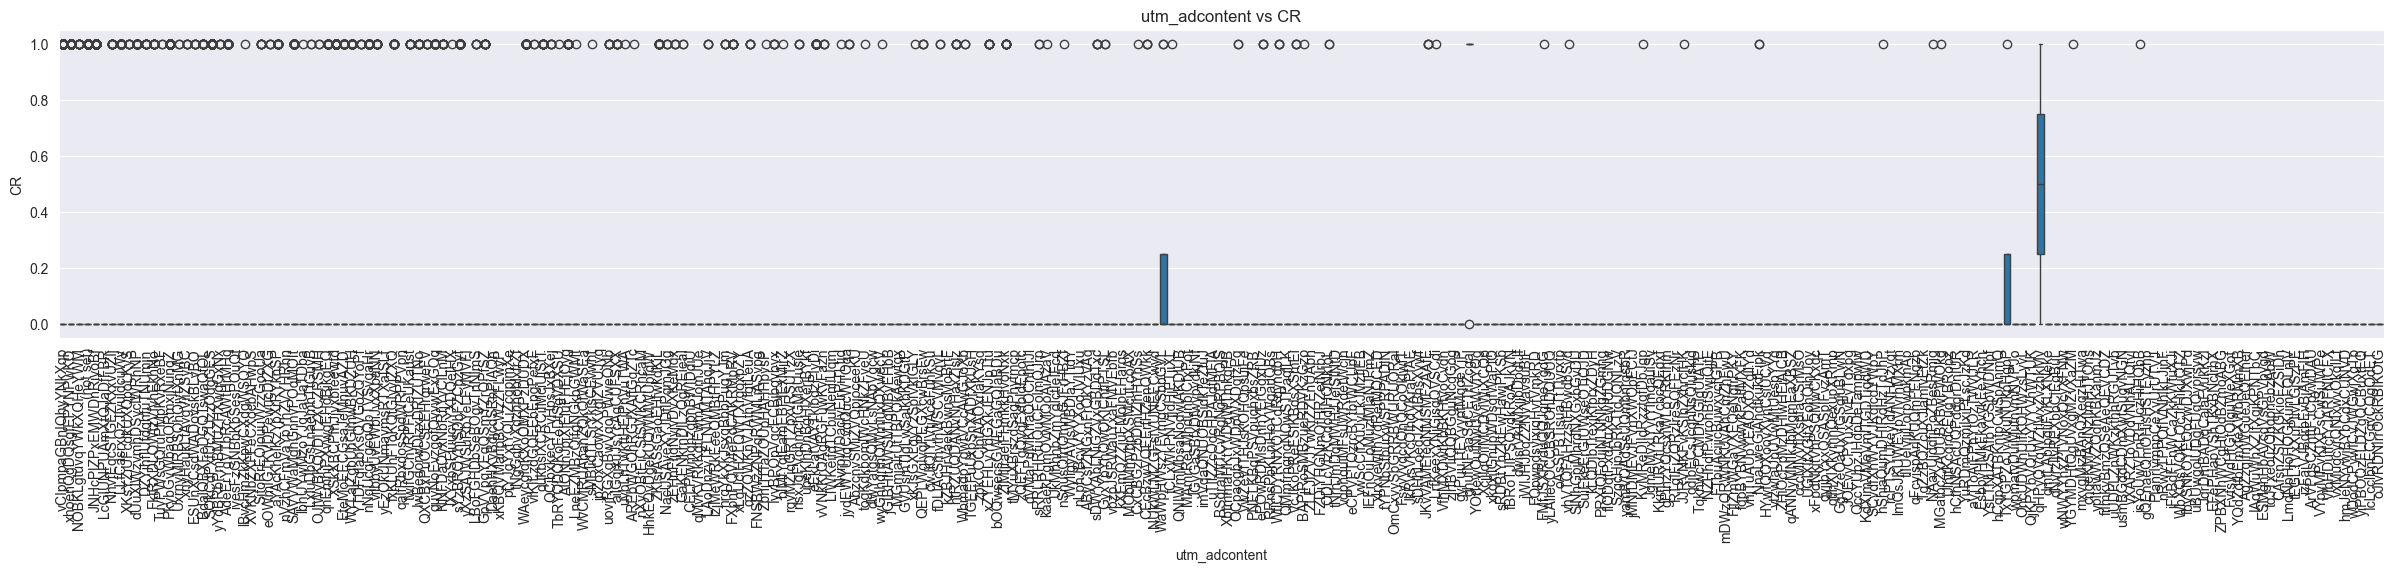

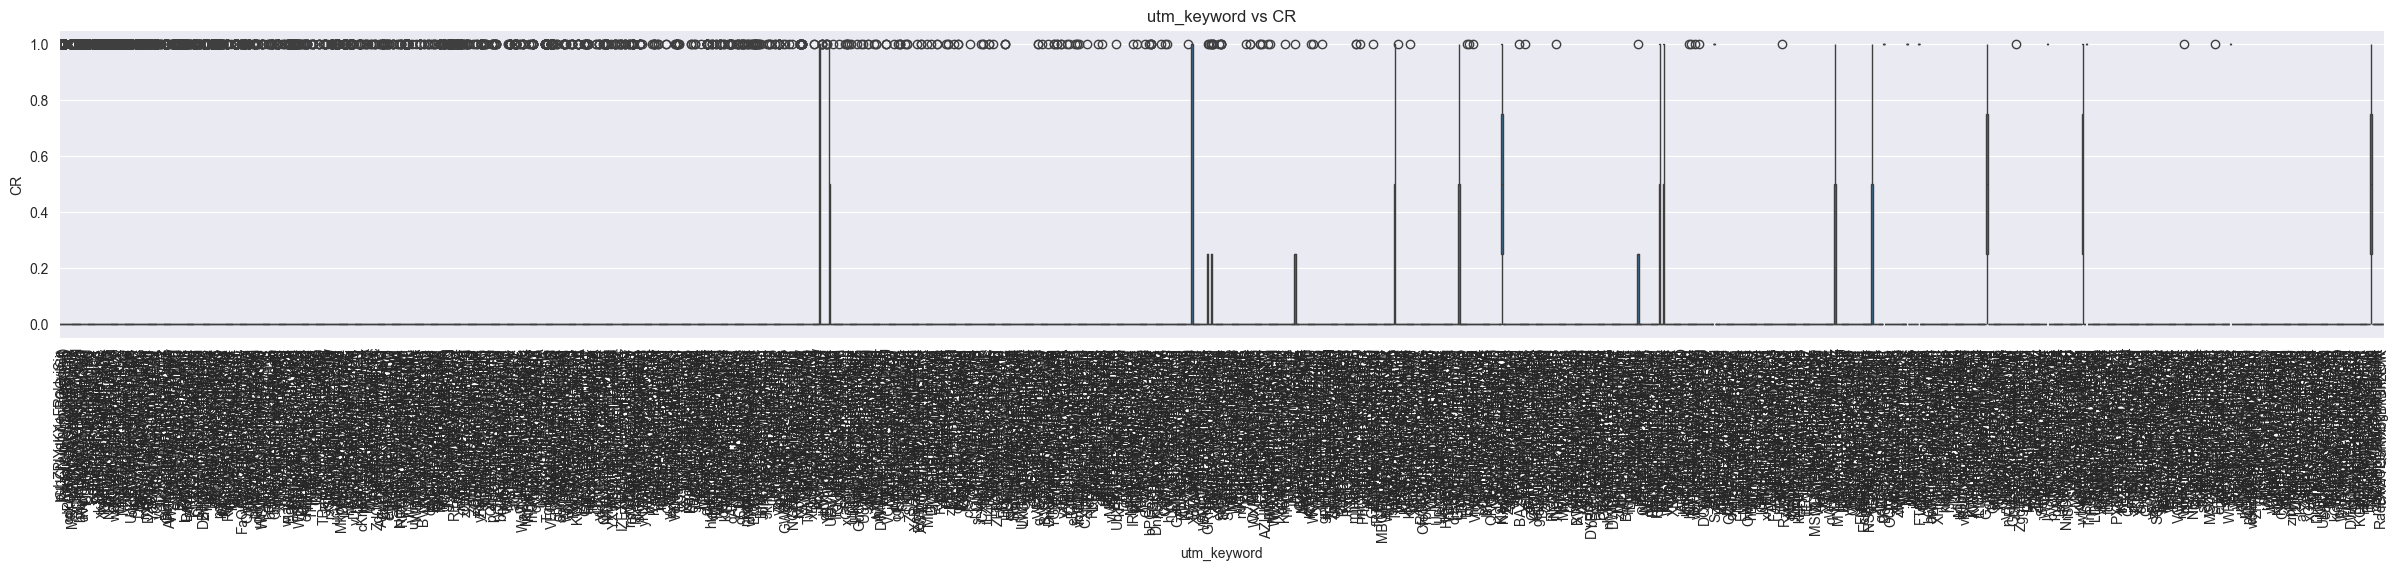

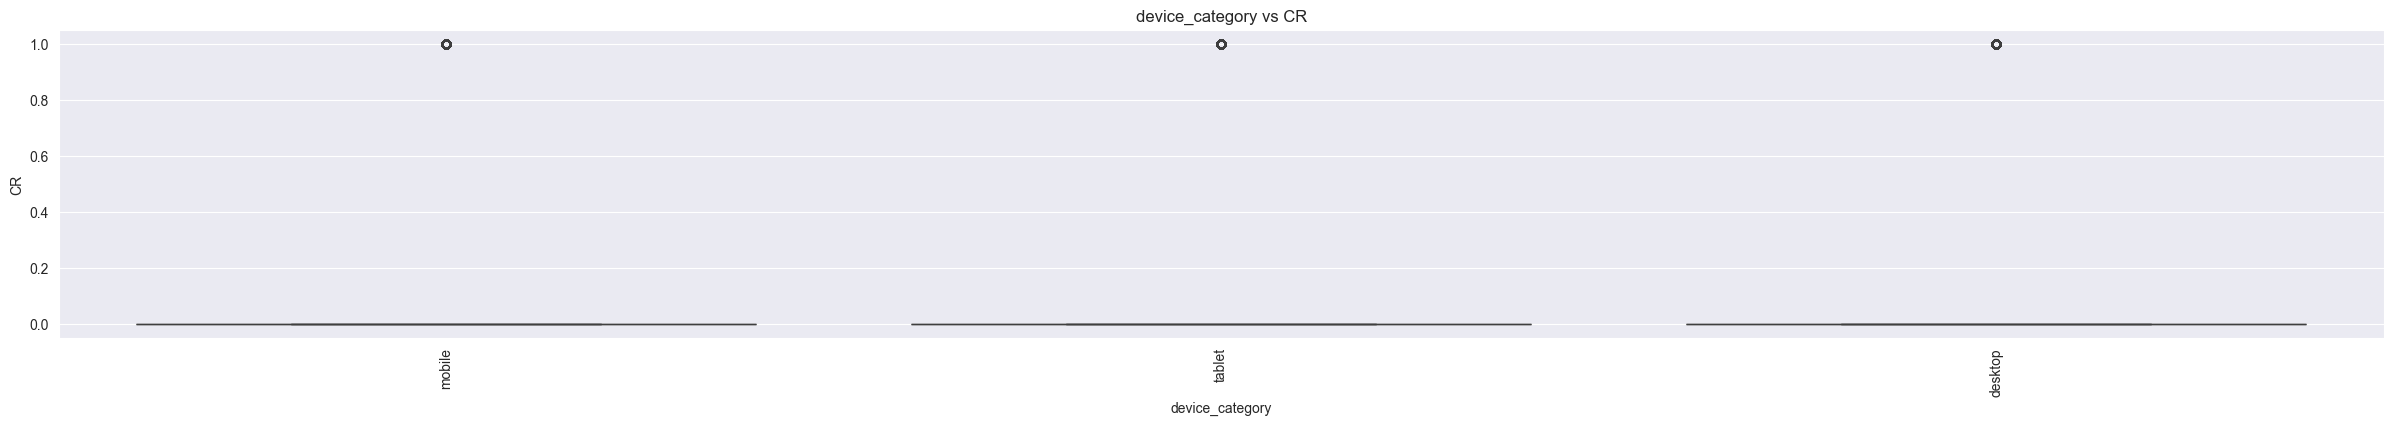

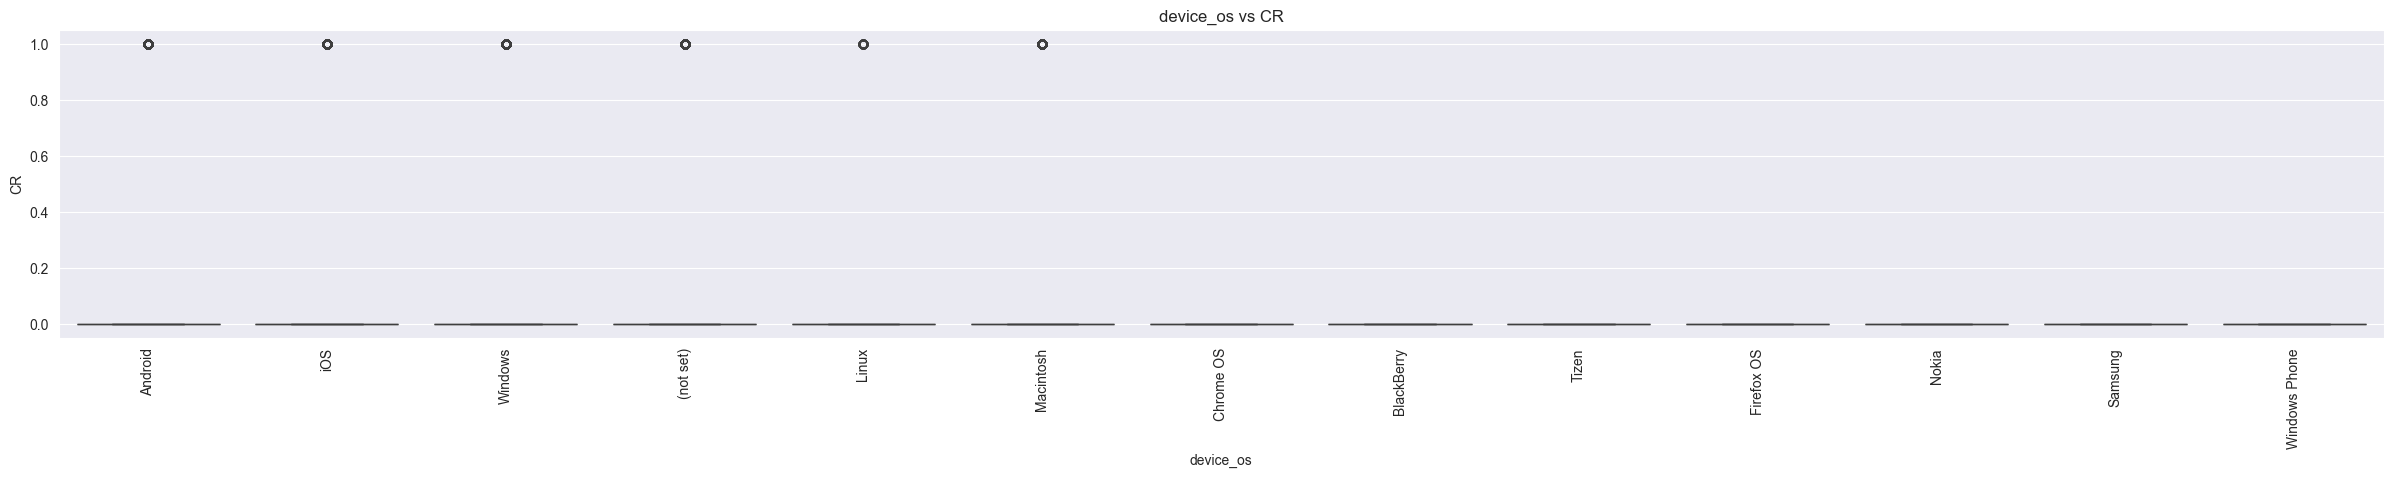

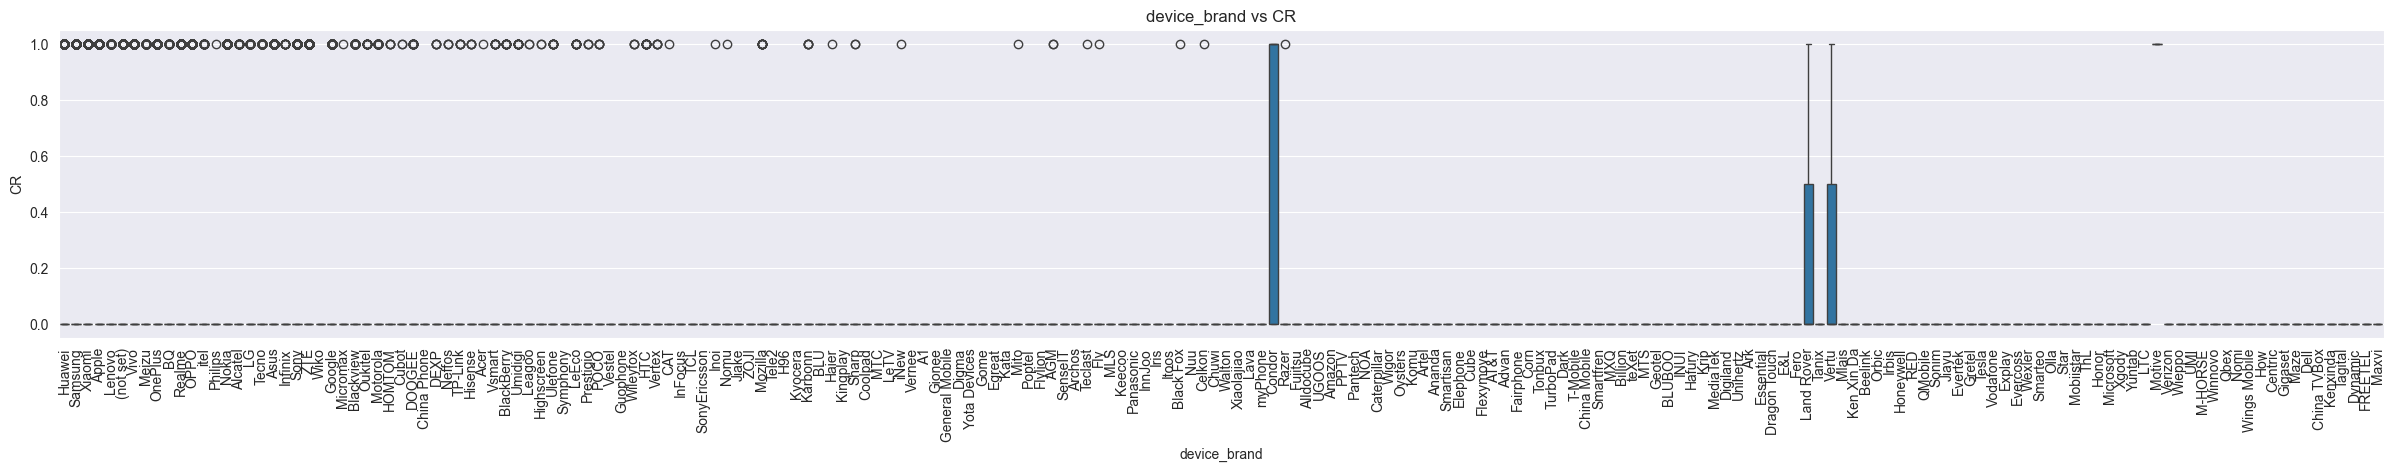

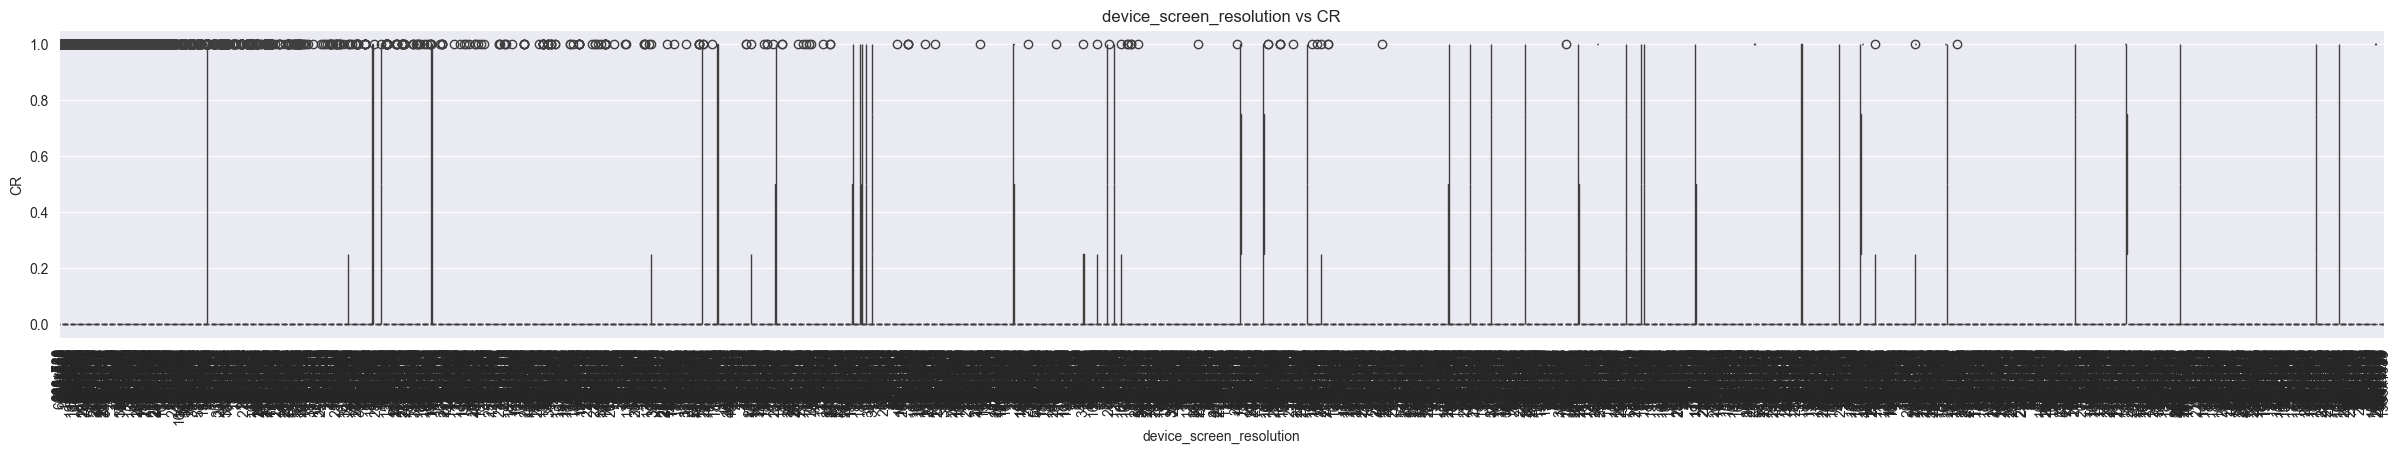

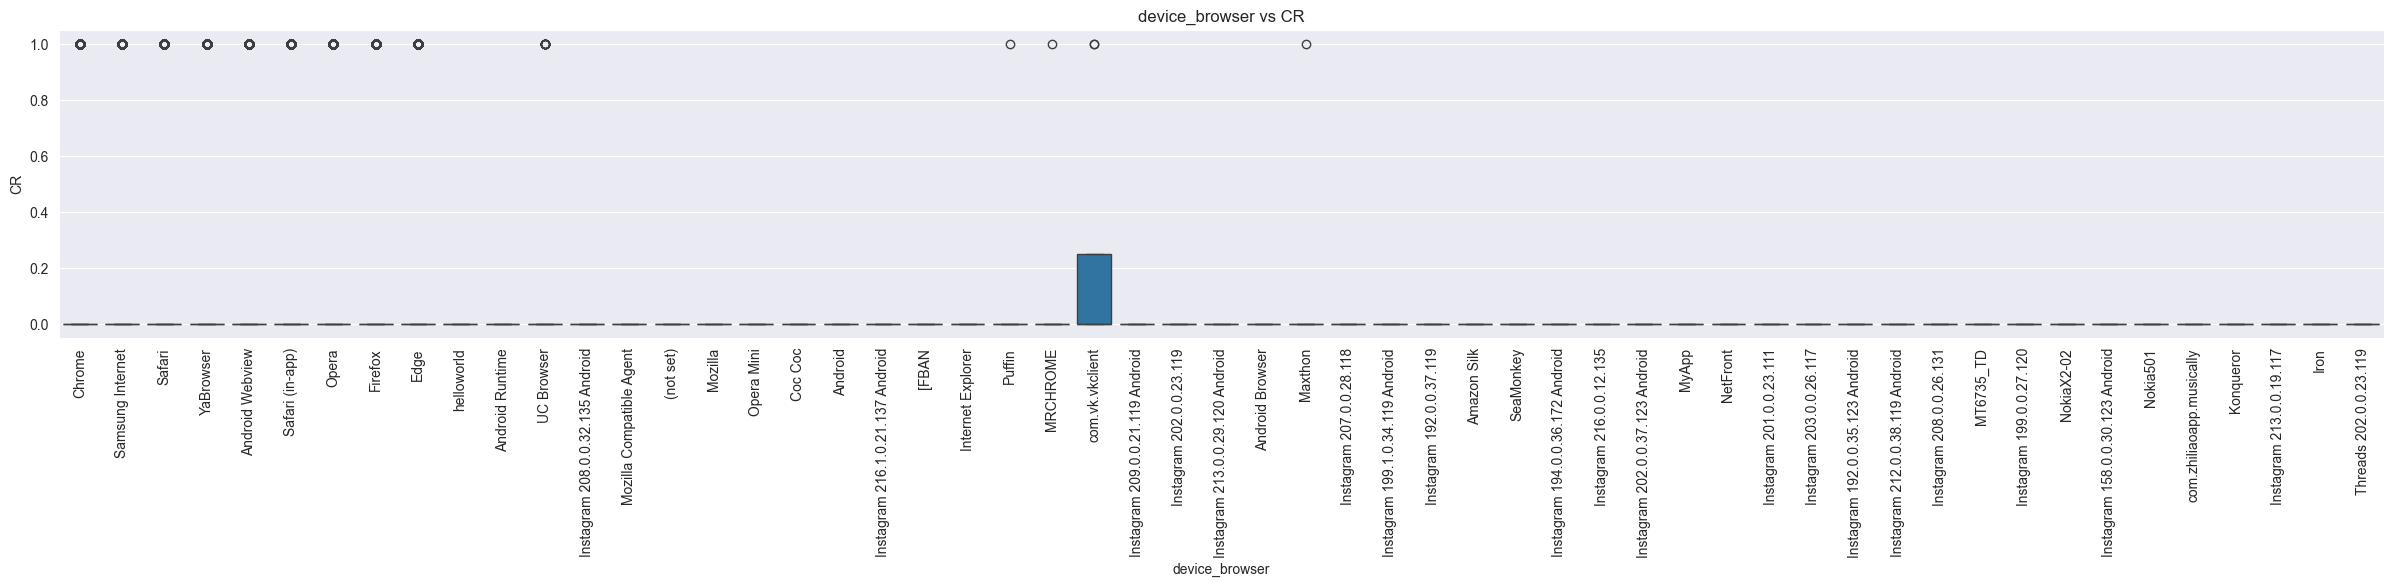

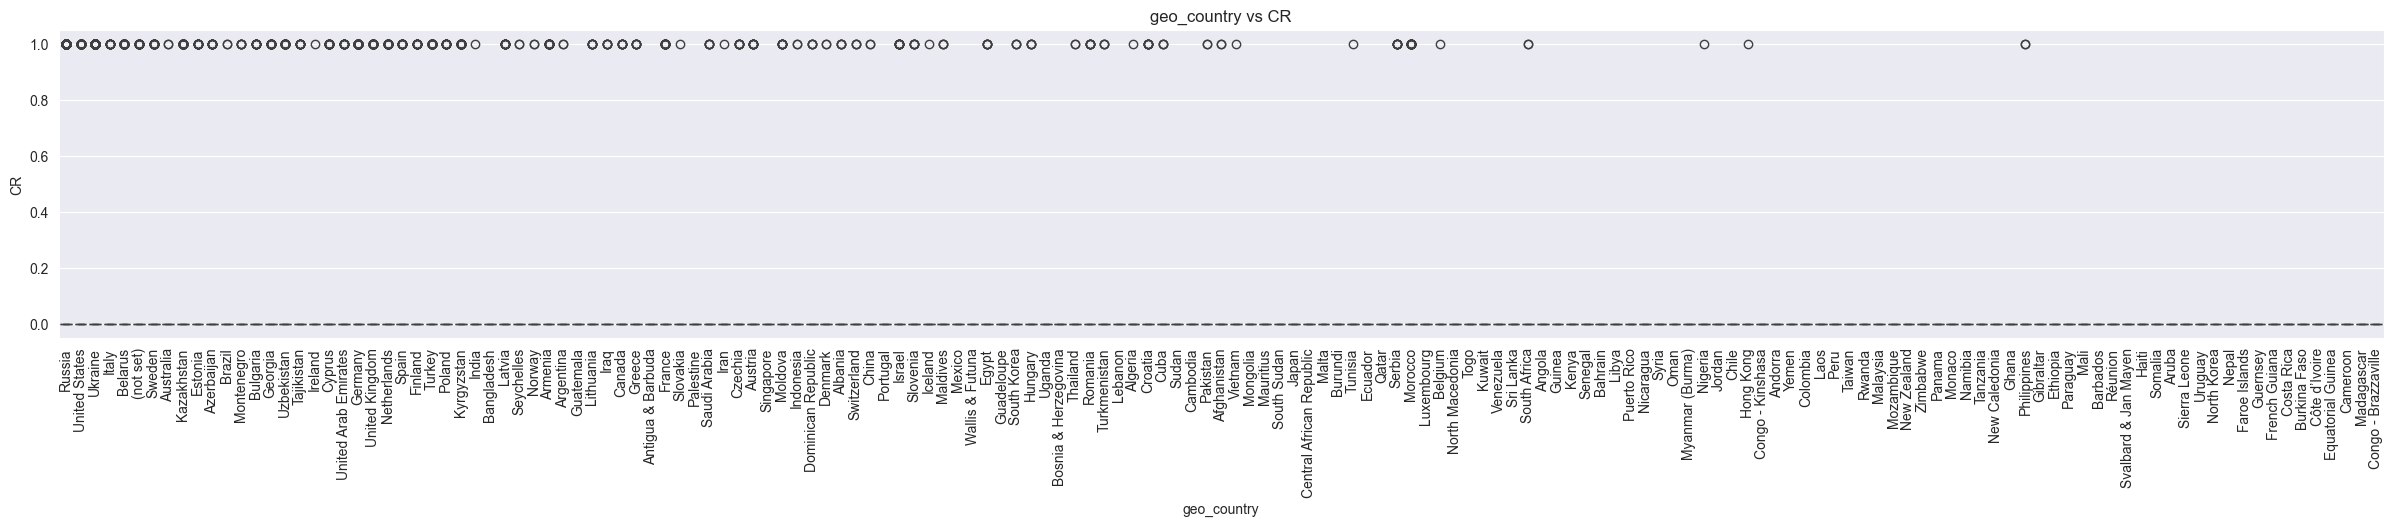

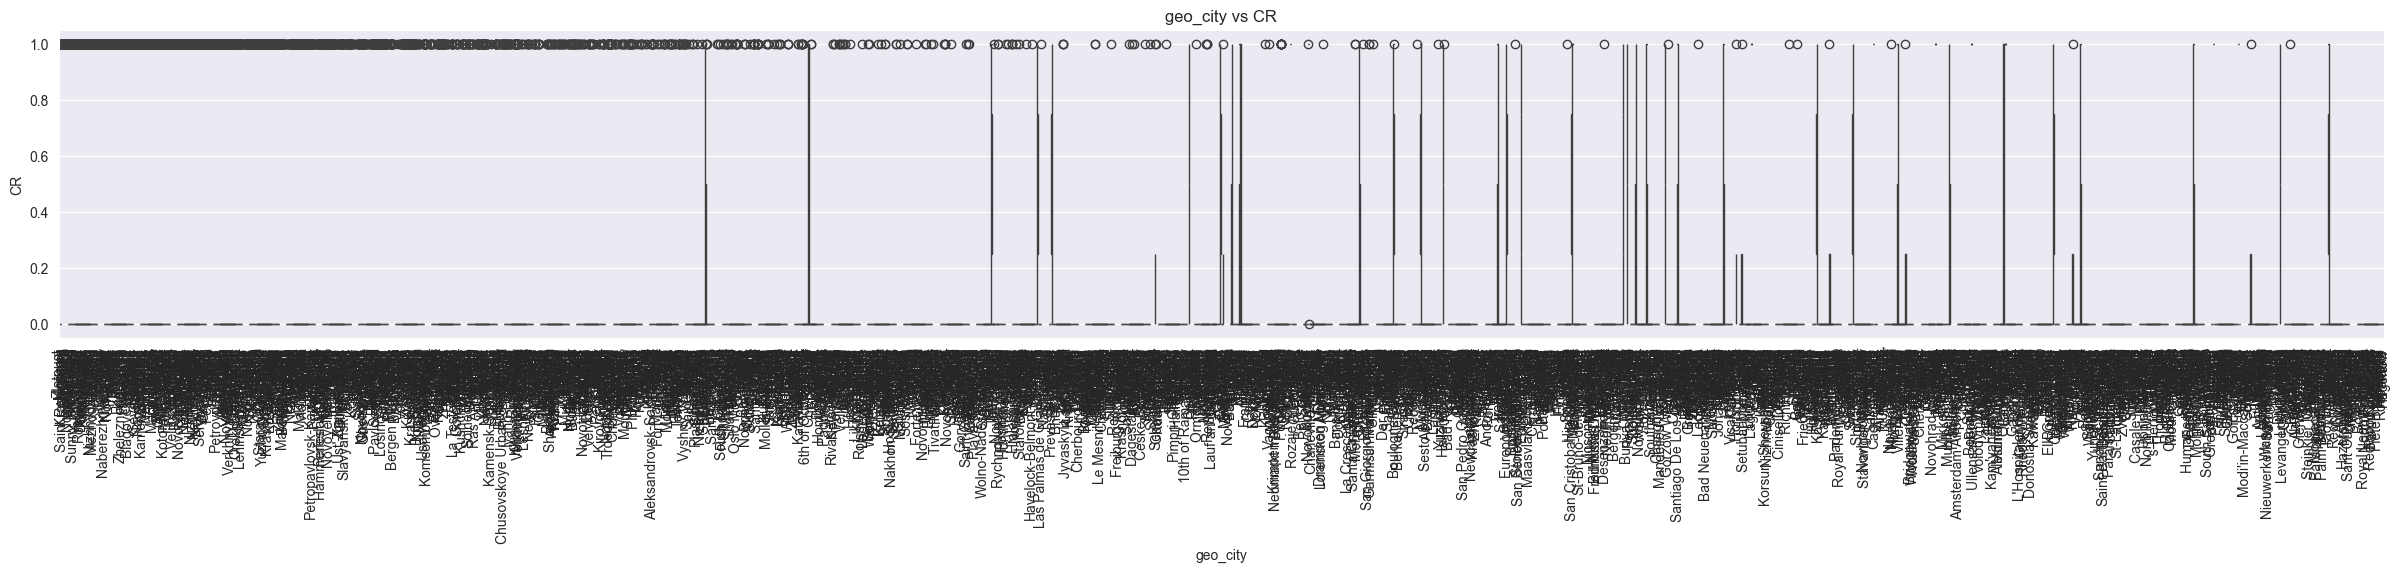

In [7]:
for feature in categorical_features:
    plt.figure(figsize=(30, 4))
    sns.boxplot(x=feature, y='CR', data=df)
    plt.title(f'{feature} vs CR')
    plt.xticks(rotation=90)
    plt.show()